In [44]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [45]:
#loading the dataset
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

In [46]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# EDA :exploratory data analysis

In [48]:
#checking shape of the dataset
df.shape

(907, 27)

In [49]:
#checking unique values
df.nunique().sort_values(ascending=False)

name                        907
gppd_idnr                   907
latitude                    836
longitude                   827
generation_gwh_2018         410
generation_gwh_2017         408
generation_gwh_2016         403
generation_gwh_2015         396
generation_gwh_2014         371
capacity_mw                 361
url                         304
owner                       280
source                      191
commissioning_year           73
primary_fuel                  8
other_fuel1                   3
geolocation_source            3
generation_data_source        1
country                       1
year_of_capacity_data         1
country_long                  1
other_fuel2                   1
generation_gwh_2013           0
wepp_id                       0
other_fuel3                   0
generation_gwh_2019           0
estimated_generation_gwh      0
dtype: int64

In [50]:
#checking unique values
print('country:',df.country.unique())
print('generation_data_source:',df.generation_data_source.unique())
print('geolocation_source:',df.geolocation_source.unique())
print('year_of_capacity_data:',df.year_of_capacity_data.unique())
print('country_long:',df.country_long.unique())
print('other_fuel2:',df.other_fuel2.unique())
print('generation_gwh_2013:',df.generation_gwh_2013.unique())
print('wepp_id:',df.wepp_id.unique())
print('other_fuel3:',df.other_fuel3.unique())
print('generation_gwh_2019:',df.generation_gwh_2019.unique())
print('estimated_generation_gwh:',df.estimated_generation_gwh.unique())

country: ['IND']
generation_data_source: [nan 'Central Electricity Authority']
geolocation_source: ['National Renewable Energy Laboratory' 'WRI' nan 'Industry About']
year_of_capacity_data: [  nan 2019.]
country_long: ['India']
other_fuel2: [nan 'Oil']
generation_gwh_2013: [nan]
wepp_id: [nan]
other_fuel3: [nan]
generation_gwh_2019: [nan]
estimated_generation_gwh: [nan]


In [51]:
df.groupby(['generation_data_source']).size()

generation_data_source
Central Electricity Authority    449
dtype: int64

In [52]:
df.groupby(['year_of_capacity_data']).size()

year_of_capacity_data
2019.0    519
dtype: int64

In [53]:
df.groupby(['other_fuel2']).size()

other_fuel2
Oil    1
dtype: int64

In [54]:
df.generation_data_source.unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [59]:
df.groupby(['primary_fuel']).size()

primary_fuel
Biomass     50
Coal       258
Gas         69
Hydro      251
Nuclear      9
Oil         20
Solar      127
Wind       123
dtype: int64

In [60]:
df.groupby(['capacity_mw']).size()

capacity_mw
0.0        1
1.0       18
1.5        3
1.7        2
1.8        1
          ..
3300.0     1
3960.0     1
4000.0     1
4620.0     1
4760.0     1
Length: 361, dtype: int64

In [55]:
#checking dtype of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

# Data Cleaning with Missing values

In [56]:
df.isnull()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,False,True,False,True,True,False,False,False,False,True,False,True
903,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True
904,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True
905,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True


In [61]:
#checking null values
df.isnull().sum().sort_values(ascending=False)

estimated_generation_gwh    907
other_fuel3                 907
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2019         907
other_fuel2                 906
other_fuel1                 709
owner                       565
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_data_source      458
year_of_capacity_data       388
commissioning_year          380
latitude                     46
longitude                    46
geolocation_source           19
country                       0
url                           0
country_long                  0
primary_fuel                  0
capacity_mw                   0
gppd_idnr                     0
name                          0
source                        0
dtype: int64

In [62]:
#dropping nan by dropna method
df1=df.dropna(how='all',axis=1)


In [65]:
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


# Transformation Techniques to convert object data into numeric data

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
#by using for loop here we encoded the object columns
for col in df1:
    if df1[col].dtype==np.number:
        continue
    df1[col]=LabelEncoder().fit_transform(df1[col])

In [68]:
df1

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0,0,0,657,2.5,28.1839,73.2407,6,3,1,2011.0,229,109,128,1,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0,0,1,519,98.0,24.7663,74.6090,1,3,1,NaN,258,174,173,2,NaN,NaN,NaN,NaN,NaN,NaN,1
2,0,0,2,853,39.2,21.9038,69.3732,7,3,1,NaN,2,21,205,2,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0,0,3,0,135.0,23.8712,91.3602,2,3,1,2004.0,280,22,58,2,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,0,0,4,1,1800.0,21.9603,82.4091,1,2,1,2015.0,280,22,58,2,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,0,0,902,491,1600.0,16.2949,77.3568,1,2,1,2016.0,280,22,58,2,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,0
903,0,0,903,822,3.0,12.8932,78.1654,6,3,1,NaN,114,77,22,0,NaN,NaN,NaN,NaN,NaN,NaN,1
904,0,0,904,891,25.5,15.2758,75.5811,7,3,1,NaN,280,21,260,2,NaN,NaN,NaN,NaN,NaN,NaN,1
905,0,0,905,539,80.0,24.3500,73.7477,1,3,1,NaN,91,59,82,2,NaN,NaN,NaN,NaN,NaN,NaN,1


now all object columns is encoded

In [69]:
#checking the overall health of the dataset
df1.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.0,907.0,907.000000,907.000000,907.000000,861.000000,861.000000,907.000000,907.000000,907.000000,527.000000,907.000000,907.000000,907.000000,907.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000,907.000000
mean,0.0,0.0,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,2.777288,0.998897,1997.091082,227.476295,43.847850,94.469680,1.754135,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.504961
std,0.0,0.0,261.972645,261.972645,590.085456,6.239612,4.939316,2.280652,0.429348,0.033204,17.082868,83.924045,44.642818,70.381222,0.700183,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,0.500251
min,0.0,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,226.500000,226.500000,16.725000,16.773900,74.256200,1.000000,3.000000,1.000000,1988.000000,188.500000,22.000000,58.000000,2.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250,0.000000
50%,0.0,0.0,453.000000,453.000000,59.200000,21.780000,76.719500,3.000000,3.000000,1.000000,2001.000000,280.000000,22.000000,58.000000,2.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375,1.000000
75%,0.0,0.0,679.500000,679.500000,385.250000,25.512400,79.440800,6.000000,3.000000,1.000000,2012.000000,280.000000,29.500000,115.500000,2.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,1.000000
max,0.0,0.0,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,3.000000,1.000000,2018.000000,280.000000,190.000000,303.000000,3.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


# filling nans with fillna method

In [72]:
df.isnull().sum().sort_values(ascending=False)

estimated_generation_gwh    907
other_fuel3                 907
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2019         907
other_fuel2                 906
other_fuel1                 709
owner                       565
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_data_source      458
year_of_capacity_data       388
commissioning_year          380
latitude                     46
longitude                    46
geolocation_source           19
country                       0
url                           0
country_long                  0
primary_fuel                  0
capacity_mw                   0
gppd_idnr                     0
name                          0
source                        0
dtype: int64

In [73]:
#filling the missing values ny fillna method
df1['latitude']=df1['latitude'].fillna(df1['latitude'].mean())
df1['longitude']=df1['longitude'].fillna(df1['longitude'].mean())
df1['commissioning_year']=df1['commissioning_year'].fillna(df1['commissioning_year'].mean())
df1['year_of_capacity_data']=df1['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])
df1['generation_gwh_2014']=df1['generation_gwh_2014'].fillna(df1['generation_gwh_2014'].mean())
df1['generation_gwh_2015']=df1['generation_gwh_2015'].fillna(df1['generation_gwh_2015'].mean())
df1['generation_gwh_2016']=df1['generation_gwh_2016'].fillna(df1['generation_gwh_2016'].mean())
df1['generation_gwh_2017']=df1['generation_gwh_2017'].fillna(df1['generation_gwh_2017'].mean())
df1['generation_gwh_2018']=df1['generation_gwh_2018'].fillna(df1['generation_gwh_2018'].mean())


In [74]:
df1.isnull().sum().sort_values(ascending=False)  

country                   0
country_long              0
generation_gwh_2018       0
generation_gwh_2017       0
generation_gwh_2016       0
generation_gwh_2015       0
generation_gwh_2014       0
year_of_capacity_data     0
geolocation_source        0
url                       0
source                    0
owner                     0
commissioning_year        0
other_fuel2               0
other_fuel1               0
primary_fuel              0
longitude                 0
latitude                  0
capacity_mw               0
gppd_idnr                 0
name                      0
generation_data_source    0
dtype: int64

now we can see all null values are  removed

In [75]:
#now checking the nans is filled or not!!!!!!!!
df1.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.0,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.0,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,0.0,0.0,453.000000,453.000000,326.223755,21.197918,77.464907,3.206174,2.777288,0.998897,1997.091082,227.476295,43.847850,94.469680,1.754135,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.504961
std,0.0,0.0,261.972645,261.972645,590.085456,6.079148,4.812291,2.280652,0.429348,0.033204,13.016360,83.924045,44.642818,70.381222,0.700183,0.0,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.500251
min,0.0,0.0,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,226.500000,226.500000,16.725000,17.072000,74.388900,1.000000,3.000000,1.000000,1997.091082,188.500000,22.000000,58.000000,2.000000,2019.0,1211.362750,916.000000,896.500214,882.594850,824.842340,0.000000
50%,0.0,0.0,453.000000,453.000000,59.200000,21.281800,76.979200,3.000000,3.000000,1.000000,1997.091082,280.000000,22.000000,58.000000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
75%,0.0,0.0,679.500000,679.500000,385.250000,25.176450,79.206100,6.000000,3.000000,1.000000,2003.000000,280.000000,29.500000,115.500000,2.000000,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
max,0.0,0.0,906.000000,906.000000,4760.000000,34.649000,95.408000,7.000000,3.000000,1.000000,2018.000000,280.000000,190.000000,303.000000,3.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


Documentation:
    
here we encoded the all object columns into numerical data

here there is high standard deviation in few of the columns 

and also  there is very high difference in 75% and max so we can say that, the outliers is present in the columns, so we can remove it by zsore method

skewness is aslo high in the few of the columns so we can remove it by power transform metohod

country ,country_long,name,name,gppdidnr this is nominal data columns so we dropped this columns .



no missing value  present in the data

In [76]:
#checking null values 
df1.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

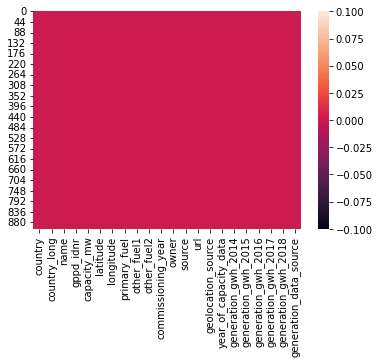

In [77]:
#checking null value by heatmap
sns.heatmap(df1.isnull())

hence we clear that no null values present in the dataset

# Dropping unwanted columns :

In [ ]:
df1.drop(columns=['country','country_long','name','url','source'],inplace=True)

In [81]:
df1.columns

Index(['gppd_idnr', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'other_fuel1', 'other_fuel2', 'commissioning_year', 'owner',
       'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [82]:
df1.drop(columns=['gppd_idnr'],inplace=True)

In [83]:
df1.drop(columns=['other_fuel2'],inplace=True)

In [84]:
df1.drop(columns='year_of_capacity_data',inplace=True)

dropping this columns bcz this is nominal columns, by using this columns we cannot describe the data so we dropped them and we dropped  the columns which ishaving null high  values 

In [87]:
df1.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,3,2011.000000,229,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,98.0,24.7663,74.6090,1,3,1997.091082,258,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,39.2,21.9038,69.3732,7,3,1997.091082,2,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,135.0,23.8712,91.3602,2,3,2004.000000,280,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,2015.000000,280,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


In [88]:
df1.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,3.206174,2.777288,1997.091082,227.476295,1.754135,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0.504961
std,590.085456,6.079148,4.812291,2.280652,0.429348,13.016360,83.924045,0.700183,2665.338608,2859.349132,2877.890004,2921.502193,3030.808041,0.500251
min,0.000000,8.168900,68.644700,0.000000,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1.000000,3.000000,1997.091082,188.500000,2.000000,1211.362750,916.000000,896.500214,882.594850,824.842340,0.000000
50%,59.200000,21.281800,76.979200,3.000000,3.000000,1997.091082,280.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
75%,385.250000,25.176450,79.206100,6.000000,3.000000,2003.000000,280.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
max,4760.000000,34.649000,95.408000,7.000000,3.000000,2018.000000,280.000000,3.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


# checking the correlation matrix:

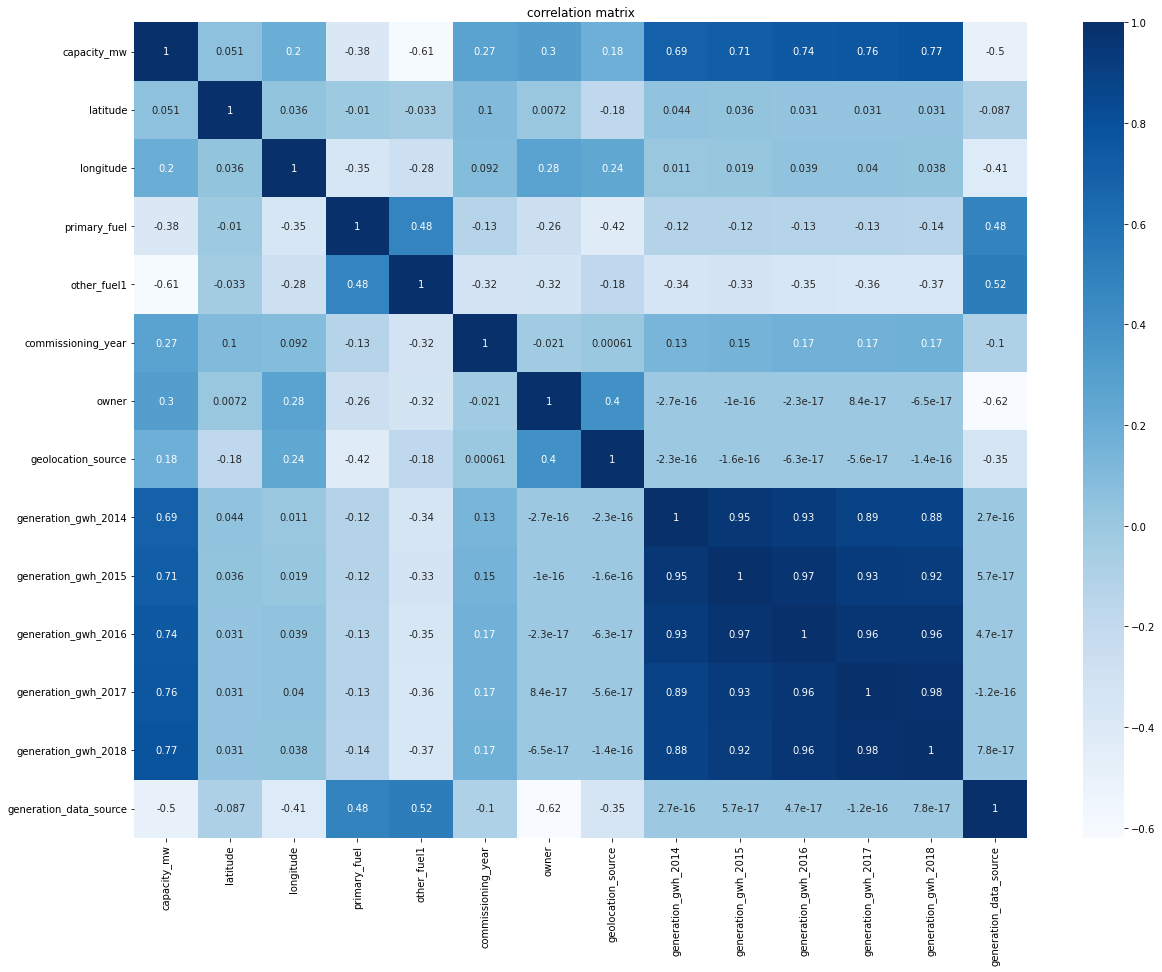

In [89]:
corr_mat=df1.corr()
plt.figure(figsize=[20,15])
sns.heatmap(corr_mat,annot=True,cmap='Blues')
plt.title('correlation matrix')
plt.show()

Documentation:-

by checking this we clearly see the multicollinearity problem exist so we can  also check with VIF to confirm the multicollinearity.

here we can see in generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 in these columns  multicollinearity problem exist

# checking correlation with label that is capacity_mw,primary_fuel seprately

In [90]:
corr_mat['capacity_mw'].sort_values(ascending=False)

capacity_mw               1.000000
generation_gwh_2018       0.773456
generation_gwh_2017       0.757585
generation_gwh_2016       0.742221
generation_gwh_2015       0.711190
generation_gwh_2014       0.694350
owner                     0.304322
commissioning_year        0.274292
longitude                 0.195882
geolocation_source        0.183419
latitude                  0.050984
primary_fuel             -0.380395
generation_data_source   -0.495833
other_fuel1              -0.606289
Name: capacity_mw, dtype: float64

In [91]:
corr_mat['primary_fuel'].sort_values(ascending=False)

primary_fuel              1.000000
generation_data_source    0.482339
other_fuel1               0.476410
latitude                 -0.010204
generation_gwh_2014      -0.124769
generation_gwh_2015      -0.124828
commissioning_year       -0.126650
generation_gwh_2016      -0.131051
generation_gwh_2017      -0.132003
generation_gwh_2018      -0.136983
owner                    -0.260389
longitude                -0.347948
capacity_mw              -0.380395
geolocation_source       -0.420263
Name: primary_fuel, dtype: float64

# checking data distribution by dist plot

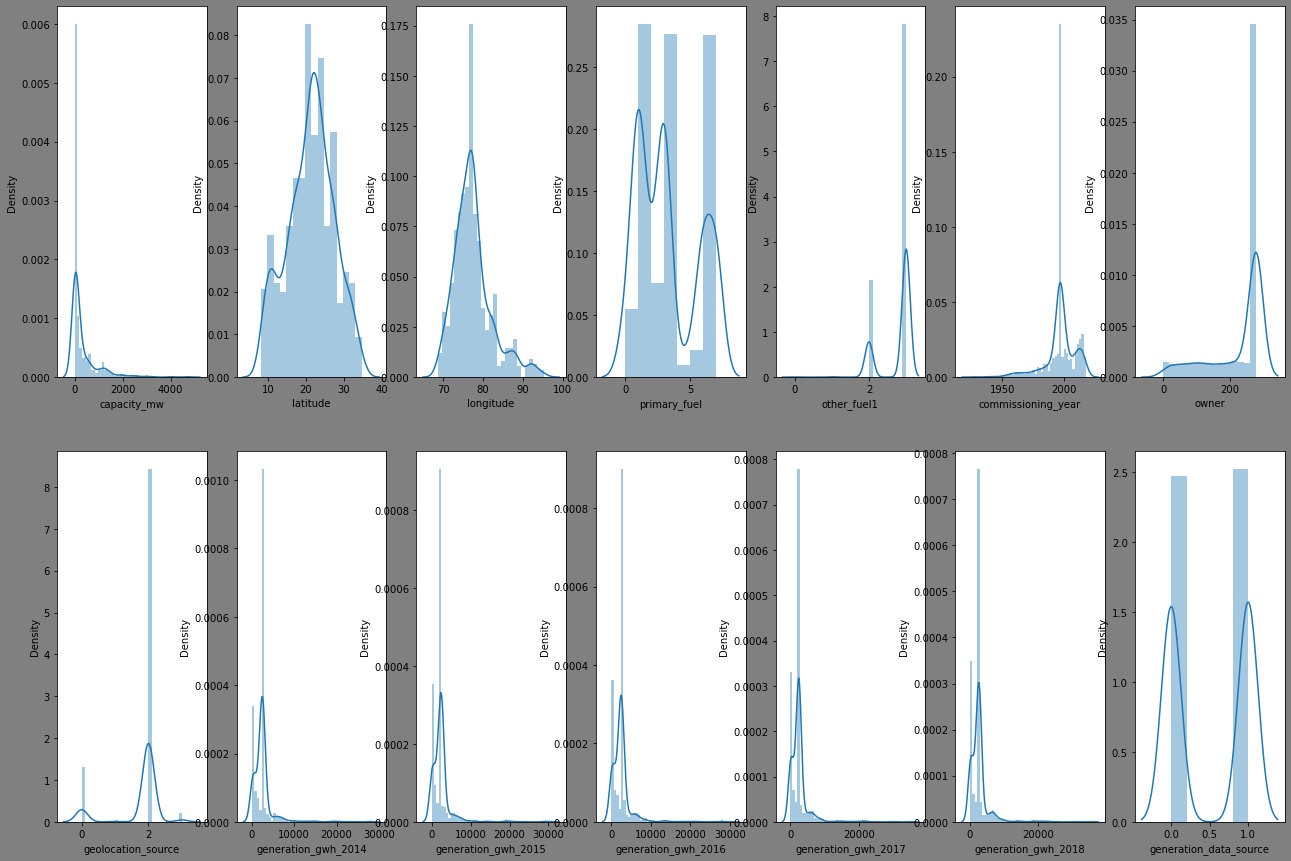

In [94]:
#checking one more time
plt.figure(figsize=(22,15),facecolor='gray')
plotnumber=1

for column in df1:
    if plotnumber<=14:
        ax=plt.subplot(2,7,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

Documentation:---


here we can see latitude and longitude this two column is looking normally distributed so ,In rest of the columns the data is spread or we say data is skewed  

# checking outliers by boxplot

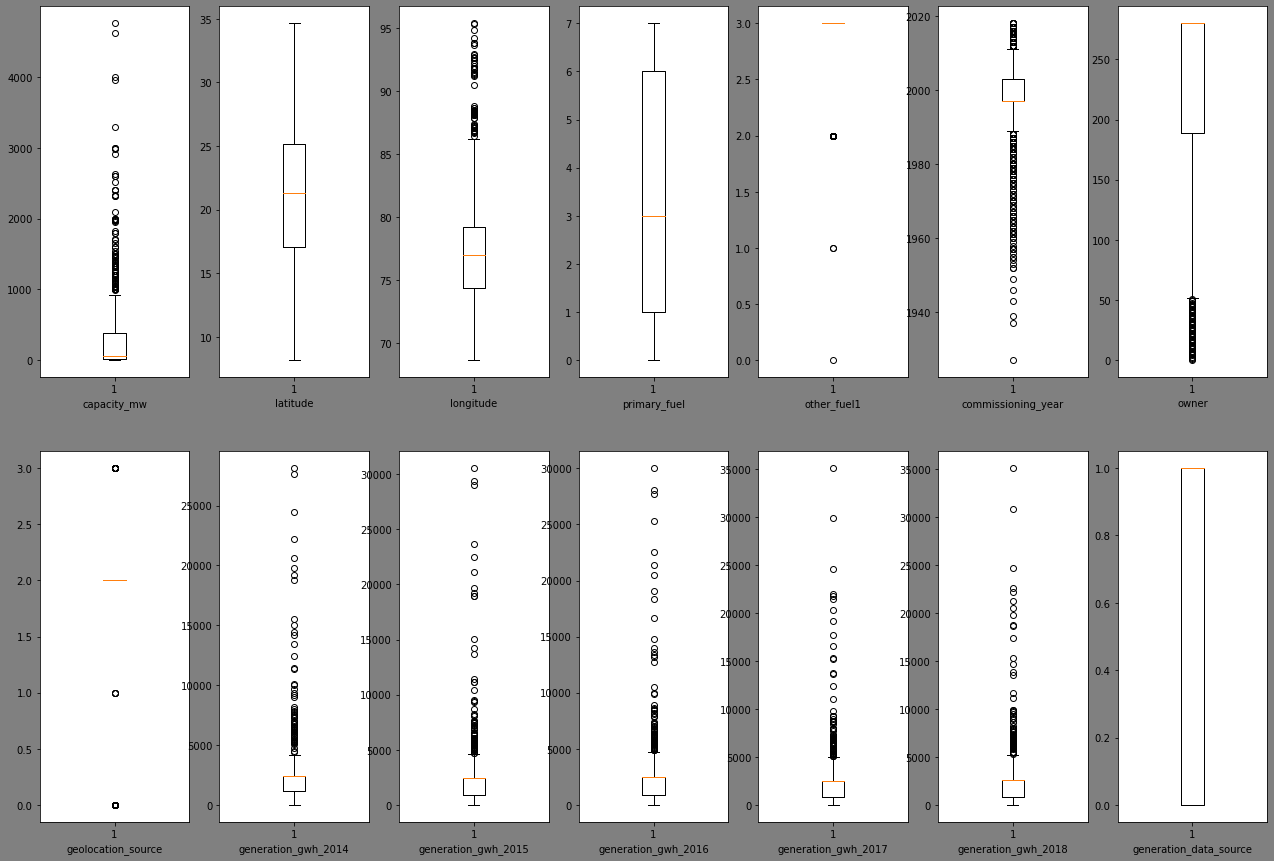

In [95]:
plt.figure(figsize=(22,15),facecolor='gray')
plotnumber=1

for column in df1:
    if plotnumber<=14:
        ax=plt.subplot(2,7,plotnumber)
        plt.boxplot(df1[column])
        plt.xlabel(column)
        
    plotnumber+=1
plt.show()

Documentation: 


here we can see lots of outliers is present in the almost all the columns so we can remove that by zscore method

# Using Zsore outlier Removing technique

In [96]:
from scipy.stats import zscore 

In [97]:
z=np.abs(zscore(df1))
z

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,0.548908,1.149805,0.878280,1.225688,0.519008,1.069162e+00,0.018166,1.077648,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126
1,0.386977,0.587311,0.593788,0.967877,0.519008,1.747794e-14,0.363907,0.351338,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126
2,0.486679,0.116179,1.682394,1.664401,0.519008,1.747794e-14,2.688153,0.351338,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126
3,0.324240,0.439989,2.889052,0.529164,0.519008,5.310801e-01,0.626193,0.351338,6.809773e-01,0.554446,0.549988,6.452243e-01,6.518573e-01,1.009973
4,2.498942,0.125479,1.027976,0.967877,1.811388,1.376637e+00,0.626193,0.351338,2.266352e-01,1.220581,1.312471,9.718925e-01,1.544399e+00,1.009973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,0.967877,1.811388,1.453505e+00,0.626193,0.351338,1.707094e-16,0.849344,0.776810,5.761719e-01,6.319636e-01,1.009973
903,0.548060,1.366853,0.145644,1.225688,0.519008,1.747794e-14,1.352877,2.506634,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126
904,0.509909,0.974707,0.391673,1.664401,0.519008,1.747794e-14,0.626193,0.351338,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126
905,0.417498,0.518793,0.772866,0.967877,0.519008,1.747794e-14,1.627085,0.351338,1.707094e-16,0.000000,0.000000,1.557412e-16,1.501244e-16,0.990126


In [98]:
threshold=3
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 222, 244, 308, 308, 308,
       308, 308, 308, 323, 333, 340, 342, 360, 363, 364, 364, 364, 364,
       364, 364, 371, 375, 416, 427, 444, 454, 478, 482, 484, 493, 493,
       493, 493, 493, 493, 494, 494, 494, 494, 494, 494, 499, 519, 538,
       541, 546, 573, 577, 583, 592, 601, 621, 638, 648, 648, 648, 648,
       648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695, 695, 695,
       695, 706, 709, 721, 721, 721, 721, 724, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786, 786,
       788, 807, 808, 808, 808, 808, 808, 808, 811, 813, 817, 818, 847,
       848, 880, 880, 880, 880, 880, 880], dtype=int64), array([ 0,  9, 10, 11, 12,  0,  8,  9, 10, 11, 12,  0,  8,  2,  2,  0,  8,
        9, 10, 11, 12,  5,  2,  0,  8,  9, 10, 11, 12,  2,  2,  2,  5,  2,
        0,  0,  8,  9, 10, 11, 12,  5,  0,  2,  2,  5,  5,  5,  0,  5,  

In [99]:
df1_new=df1[(z<3).all(axis=1)]

In [100]:
df1_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,3,2011.000000,229,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
1,98.0,24.7663,74.6090,1,3,1997.091082,258,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
2,39.2,21.9038,69.3732,7,3,1997.091082,2,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
3,135.0,23.8712,91.3602,2,3,2004.000000,280,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,2015.000000,280,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2,2016.000000,280,2,2431.823590,0.994875,233.596650,865.400000,686.500000,0
903,3.0,12.8932,78.1654,6,3,1997.091082,114,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
904,25.5,15.2758,75.5811,7,3,1997.091082,280,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1
905,80.0,24.3500,73.7477,1,3,1997.091082,91,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1


here  the outliers is present Here we can see the outlier are still present but now we cant remove outlier as it is not best practise to apply z score method twice on data due to data loss which is suggested by shankar sir

In [101]:
df1_new.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,268.556727,21.116391,77.060117,3.274232,2.797872,1997.936785,223.833333,1.738771,2185.449191,2152.586283,2190.919311,2257.941826,2290.858532,0.528369
std,424.327486,6.117216,4.305353,2.325668,0.401824,11.101507,85.655160,0.719359,1490.489046,1530.582335,1588.211519,1630.263952,1676.727656,0.499490
min,0.000000,8.168900,68.644700,0.000000,2.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.125000,16.926400,74.275300,1.000000,3.000000,1997.091082,177.000000,2.000000,1288.251375,1058.189525,1000.404000,1014.721113,944.183763,0.000000
50%,50.400000,21.208800,76.748800,3.000000,3.000000,1997.091082,280.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
75%,330.000000,25.136350,78.930850,6.000000,3.000000,2003.000000,280.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1.000000
max,2000.000000,34.649000,91.823900,7.000000,3.000000,2018.000000,280.000000,3.000000,10063.180000,10422.690000,10503.882000,9833.690000,9859.500000,1.000000


# Creating feature and labels

In [102]:
X=df1_new.drop(columns=['primary_fuel','capacity_mw'])

y=df1_new.capacity_mw          #label for regression 

y1=df1_new.primary_fuel        #label for classification   

In [105]:
y.shape

(846,)

In [106]:
y1.shape

(846,)

# checking skewness

In [107]:
X.skew().sort_values(ascending=False)

generation_gwh_2014       1.528119
generation_gwh_2016       1.415654
generation_gwh_2015       1.393389
generation_gwh_2018       1.317157
generation_gwh_2017       1.278736
longitude                 0.918369
generation_data_source   -0.113860
latitude                 -0.114572
commissioning_year       -0.839580
owner                    -1.273628
other_fuel1              -1.486112
geolocation_source       -1.820332
dtype: float64

# removing skewness by power transform method

In [108]:
from sklearn.preprocessing import power_transform

In [109]:
x_new=power_transform(X)

In [110]:
pd.DataFrame(x_new).skew().sort_values(ascending=False)

3     0.031951
1    -0.000234
0    -0.070666
5    -0.078291
11   -0.113860
6    -0.237727
8    -0.298196
7    -0.300544
9    -0.336118
10   -0.345208
4    -0.958173
2    -1.486112
dtype: float64

In [111]:
pd.DataFrame(x_new,columns=X.columns).skew().sort_values(ascending=False)

commissioning_year        0.031951
longitude                -0.000234
latitude                 -0.070666
geolocation_source       -0.078291
generation_data_source   -0.113860
generation_gwh_2014      -0.237727
generation_gwh_2016      -0.298196
generation_gwh_2015      -0.300544
generation_gwh_2017      -0.336118
generation_gwh_2018      -0.345208
owner                    -0.958173
other_fuel1              -1.486112
dtype: float64

In [112]:
x1=pd.DataFrame(x_new,columns=X.columns)

In [113]:
x1.skew().sort_values(ascending=False)

commissioning_year        0.031951
longitude                -0.000234
latitude                 -0.070666
geolocation_source       -0.078291
generation_data_source   -0.113860
generation_gwh_2014      -0.237727
generation_gwh_2016      -0.298196
generation_gwh_2015      -0.300544
generation_gwh_2017      -0.336118
generation_gwh_2018      -0.345208
owner                    -0.958173
other_fuel1              -1.486112
dtype: float64

now all skewness isremoved

In [114]:
x1

,latitude,longitude,other_fuel1,commissioning_year,owner,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,1.161523,-0.930012,0.503322,1.291069,-0.146751,-1.487050,0.323743,0.351937,0.354634,0.357832,0.370087,0.944784
1,0.592221,-0.511794,0.503322,-0.185356,0.319780,0.257730,0.323743,0.351937,0.354634,0.357832,0.370087,0.944784
2,0.119374,-2.362318,0.503322,-0.185356,-1.985245,0.257730,0.323743,0.351937,0.354634,0.357832,0.370087,0.944784
3,0.443951,2.442400,0.503322,0.499055,0.706916,0.257730,-1.051781,-0.739684,-0.693180,-0.908874,-0.935923,-1.058443
4,0.128669,1.251229,-1.986799,1.793400,0.706916,0.257730,0.663365,1.902581,1.941416,1.565007,2.130259,-1.058443
...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.794802,0.216668,-1.986799,1.925068,0.706916,0.257730,0.323743,-2.104278,-1.430355,-0.724754,-0.877520,-1.058443
842,-1.339624,0.406291,0.503322,-0.185356,-1.494329,-2.097648,0.323743,0.351937,0.354634,0.357832,0.370087,0.944784
843,-0.958876,-0.238166,0.503322,-0.185356,0.706916,0.257730,0.323743,0.351937,0.354634,0.357832,0.370087,0.944784
844,0.523217,-0.770306,0.503322,-0.185356,-1.664417,0.257730,0.323743,0.351937,0.354634,0.357832,0.370087,0.944784


# USing Variance inflation Factor

we can see various features are highly correlated with each other so we can drop such columns by checking VIF score 


if VIF score is greater than 5 then we can drop this column 


standard size of VIF is 5

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x1.columns
vif['vif']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
10,generation_gwh_2018,12.960386
9,generation_gwh_2017,12.618095
8,generation_gwh_2016,11.872752
7,generation_gwh_2015,7.992261
6,generation_gwh_2014,4.235273
11,generation_data_source,3.216520
2,other_fuel1,2.199146
4,owner,1.905415
1,longitude,1.326024
3,commissioning_year,1.257473


here we can see generation_gwh_2016 columns has high VIF value so we can drop this column

In [116]:
x1.drop(columns='generation_gwh_2018',axis=1,inplace=True)

Applying multicollinearity again to remove another column if it is highly corelated

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x1.columns
vif['vif']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
8,generation_gwh_2016,11.156978
7,generation_gwh_2015,7.977147
9,generation_gwh_2017,5.879231
6,generation_gwh_2014,4.209589
10,generation_data_source,3.199206
2,other_fuel1,2.196801
4,owner,1.905408
1,longitude,1.324688
3,commissioning_year,1.255654
5,geolocation_source,1.192319


here we can see generation_gwh_2018 columns has high VIF value so we can drop this column

In [118]:
x1.drop(columns='generation_gwh_2016',axis=1,inplace=True)

Applying multicollinearity again to remove another column if it is highly corelated

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature']=x1.columns
vif['vif']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
vif.sort_values(by='vif',ascending=False)

,feature,vif
7,generation_gwh_2015,5.207010
6,generation_gwh_2014,4.209403
8,generation_gwh_2017,3.234718
9,generation_data_source,3.180330
2,other_fuel1,2.190367
4,owner,1.905180
1,longitude,1.317191
3,commissioning_year,1.243604
5,geolocation_source,1.192201
0,latitude,1.076447


here we can see generation_gwh_2015 columns has high VIF value so we can drop this column

Here we can see every column now is under 5 value of VIF which is standard value hence we are not going to remove any more column

In [120]:
x1.shape

(846, 10)

In [121]:
y.shape

(846,)

In [122]:
y1.shape

(846,)

# Model Prediction

First we are going start with capacity mw

This output columns is having continuos value hence we are going to apply regreesion models

we are going to use various  models for regression and checking the accuracy 

and then using the hyper parameter tunning with best algorithm parameters

# Using Linear Regression Algorithm

In [123]:
#To get best Test size number from 1 to 40%
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=i1)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7923240024007706 Random state 0.1
accuracy 0.8098691731468018 Random state 0.12
accuracy 0.8139242038365997 Random state 0.13
accuracy 0.8558565363781363 Random state 0.23
Best accuracy is 85.58565363781364 on Random state 0.23


In [125]:
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.23,random_state=i) 
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=lr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.780517187413496 Random state 1
accuracy 0.8415459648537529 Random state 3
accuracy 0.8580118009992157 Random state 192
Best accuracy is 85.80118009992157 on Random state 192


# Using train_test_split¶

In [126]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.23,random_state=192)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=lr.score(x_test,y_test)


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(85.80118009992157, 93.86262831043989, 151.5097356181408)

The Linear regression is giving 85.80% acuracy

# USing Decision Tree Regressor 

In [127]:
#finding best testsize 
from sklearn.tree import DecisionTreeRegressor

maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=i1)
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.4846878109303203 Random state 0.1
accuracy 0.4913521860391413 Random state 0.11
accuracy 0.5242757573155685 Random state 0.12
accuracy 0.6604483382146933 Random state 0.13
accuracy 0.749229212943513 Random state 0.15
accuracy 0.7726028103417169 Random state 0.18
Best accuracy is 77.26028103417168 on Random state 0.18


# finding best random state

In [128]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,500):
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.18,random_state=i) #12 - 77.41
    dt=DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred=dt.predict(x_test)
    acc=dt.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.5445292994356012 Random state 1
accuracy 0.6299604432944104 Random state 2
accuracy 0.695545225861358 Random state 3
accuracy 0.7005673623267789 Random state 9
accuracy 0.7514468575790842 Random state 10
accuracy 0.8462821529994653 Random state 14
Best accuracy is 84.62821529994653 on Random state 14


# checking accuracy

In [129]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.18,random_state=14) 
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=dt.score(x_test,y_test)


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(75.27048356339694, 107.46898039215687, 218.2010621930311)

descision tree regressor is giving 75.27 accuracy

# Using Random Forest Regressor algorithm

In [130]:
#finding best testsize 
from sklearn.ensemble import RandomForestRegressor 

maxAcc = 0
maxRs=0

for i in range(9,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=i1)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7867223995134407 Random state 0.09
accuracy 0.8029621737383272 Random state 0.11
accuracy 0.8606391124806605 Random state 0.12
Best accuracy is 86.06391124806605 on Random state 0.12


# finding best random state

In [131]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,400):
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.12,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=rf.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.7728847925830074 Random state 1
accuracy 0.836346682521055 Random state 3
accuracy 0.9050900408651149 Random state 5
accuracy 0.9243006486737584 Random state 48
Best accuracy is 92.43006486737583 on Random state 48


# checking accuracy

In [132]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.12,random_state=48) 
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=rf.score(x_test,y_test)
pred_f=y_test


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(92.35900257190563, 69.61556444911298, 105.7669544785323)

Random algorithm will giving    92.35 % accuracy

# using Knneighborsregressor

In [133]:
#To get best Test size number from 1 to 40%
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=i1)
    knr=KNeighborsRegressor()
    knr.fit(x_train,y_train)
    pred=knr.predict(x_test)
    acc=knr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8683365137042827 Random state 0.1
accuracy 0.8876937817510492 Random state 0.13
Best accuracy is 88.76937817510492 on Random state 0.13


# finding best random state¶

In [134]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,400):
    x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.13,random_state=i) 
    knr=KNeighborsRegressor()
    knr.fit(x_train,y_train)
    pred=knr.predict(x_test)
    acc=knr.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.7856723484460804 Random state 1
accuracy 0.7908002334894819 Random state 3
accuracy 0.8070689454763559 Random state 5
accuracy 0.811761115145982 Random state 6
accuracy 0.8325217173014363 Random state 12
accuracy 0.8498443816941045 Random state 21
accuracy 0.863587810012822 Random state 23
accuracy 0.8923453759878041 Random state 31
accuracy 0.8925867059755794 Random state 48
accuracy 0.9106299983645779 Random state 376
Best accuracy is 91.06299983645779 on Random state 376


# checking accuracy

In [135]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.13,random_state=376) 
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
pred=knr.predict(x_test)
acc=knr.score(x_test,y_test)
pred_f=y_test


#print("predicted values",pred)
#print("predicted values",y_test)
r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(91.06299983645779, 61.216052727272725, 109.57565611321621)

KNeighborsRegressor is giving 91.06% acccuracy

# Random Forest Regressor is giving highest accuracy 92.41% 
 

# checking cross validation for all algorithms

In [136]:
from sklearn.model_selection import cross_val_score

In [137]:
#linear regression
scr=cross_val_score(lr,x1,y)
print('cross validation score',scr.mean())

cross validation score 0.742277681801538


In [138]:
#desicion treeregressor
scr=cross_val_score(dt,x1,y)
print('cross validation score',scr.mean())

cross validation score 0.516770506706428


In [139]:
#random forest regressor
scr=cross_val_score(rf,x1,y)
print('cross validation score',scr.mean())

cross validation score 0.7737181978833296


In [140]:
#Knregressor
scr=cross_val_score(knr,x1,y)
print('cross validation score',scr.mean())

cross validation score 0.7469807131529818


so random forest regresor is giving highest validation accuracy so we will continue with random forest regressor

# Using hyperparameter tunning

In [141]:


from sklearn.model_selection import GridSearchCV
clf = RandomForestRegressor()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['mae','mse'],
        'n_estimators':[5,10,15]
       }

for j in range(2,15):
    grd=GridSearchCV(clf,param_grid=params,cv=j,scoring='accuracy')
    grd.fit(x_train,y_train)
    print('best_params:',grd.best_params_)
    grd=grd.best_estimator_
    grd.fit(x_train,y_train)
    y_pred=grd.predict(x_test)
    print(r2_score(y_test,y_pred))
    print('CV:',j)



best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8122583804017525
CV: 2
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8252648257735918
CV: 3
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8384456829766851
CV: 4
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8419565400069403
CV: 5
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8430169826181233
CV: 6
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.83518695760492
CV: 7
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.812394396877965
CV: 8
best_params: {'criterion': 'mae', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 5}
0.8198442802320386
CV: 9
best_params: {'criterion': 'mae', 'max_depth': 10, 

# Final Model To Predict first output column "Capacity MW"

In [142]:
#from sklearn.ensemble import RandomForestClassifier 

x_train, x_test, y_train, y_test= train_test_split(x1,y,test_size=0.28,random_state=273) 
rf2=RandomForestRegressor(criterion= 'mae', max_depth= 10, max_features= 'auto',n_estimators=5)
rf2=RandomForestRegressor()
rf2.fit(x_train,y_train)
pred=rf2.predict(x_test)
acc=rf2.score(x_test,y_test)
pred_f=y_test

r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))

(86.67105483454934, 97.98615034324558, 165.92812956636953)

random forest classifier is giving 86.67 % accuracy 

# Model to predict second output column primary_fuel

The output column primary_fuel is multiple classified data hence for this output we will use classification models 

in the classification model first we find the all algorithm score then in that we choose best algorithm 


then checking the validationscore by cross validation


then checking the hyperparameter tunning to improve the accuracy


then plot the Roc auc curve to check the performance of the model



# DecisionTreeClassifier()

In [143]:
y1.shape

(846,)

In [144]:
x1.shape

(846, 10)

In [166]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=i1)
    dt1=DecisionTreeClassifier()
    dt1.fit(x_train,y_train)
    pred=dt1.predict(x_test)
    acc=dt1.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8470588235294118 Random state 0.1
accuracy 0.851063829787234 Random state 0.11
accuracy 0.8921568627450981 Random state 0.12
Best accuracy is 89.2156862745098 on Random state 0.12


# finding the best random state¶

In [167]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.12,random_state=i) 
    dt1=DecisionTreeClassifier()
    dt1.fit(x_train,y_train)
    pred=dt1.predict(x_test)
    acc=dt1.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.7941176470588235 Random state 1
accuracy 0.8333333333333334 Random state 3
accuracy 0.8627450980392157 Random state 6
accuracy 0.8921568627450981 Random state 8
accuracy 0.9313725490196079 Random state 10
Best accuracy is 93.13725490196079 on Random state 10


In [168]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.12,random_state=10) 
dt1=DecisionTreeClassifier()
dt1.fit(x_train,y_train)
pred=dt1.predict(x_test)
acc=dt1.score(x_test,y_test)


#print("predicted values",pred)
#print("predicted values",y_test)
#r2_score(y_test, pred)*100, mean_absolute_error(y_test, pred), np.sqrt(mean_squared_error(y_test, pred))
#pred_test=dt1.predict(x_test)
print('Accuracy Score',dt1,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score DecisionTreeClassifier() is:
0.9313725490196079
[[ 1  1  0  0  0  0  0  0]
 [ 0 25  1  0  0  1  0  0]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  1 23  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  1  0  1  0  0  0 13]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.93      0.93      0.93        27
           2       0.67      1.00      0.80         4
           3       0.92      0.96      0.94        24
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        28
           7       1.00      0.87      0.93        15

    accuracy                           0.93       102
   macro avg       0.81      0.78      0.78       102
weighted avg       0.94      0.93      0.93       102



# DecisionTreeClassifier is giving 94.4% accuracy 

# Using KNeighborsClassifier algorithm¶

In [169]:

from sklearn.neighbors import KNeighborsClassifier



maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.01
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=i1)
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.7529411764705882 Random state 0.1
accuracy 0.8404255319148937 Random state 0.11
accuracy 0.8431372549019608 Random state 0.12
Best accuracy is 84.31372549019608 on Random state 0.12


In [170]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.12,random_state=i) 
    knc=KNeighborsClassifier()
    knc.fit(x_train,y_train)
    pred=knc.predict(x_test)
    acc=knc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs) 

accuracy 0.7941176470588235 Random state 1
accuracy 0.803921568627451 Random state 3
accuracy 0.8137254901960784 Random state 5
accuracy 0.8235294117647058 Random state 7
accuracy 0.8725490196078431 Random state 8
accuracy 0.8823529411764706 Random state 9
accuracy 0.9215686274509803 Random state 10
Best accuracy is 92.15686274509804 on Random state 10


In [171]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.12,random_state=10) 
knc=KNeighborsClassifier()
knc.fit(x_train,y_train)
pred=knc.predict(x_test)
acc=knc.score(x_test,y_test)

print('Accuracy Score',knc,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score KNeighborsClassifier() is:
0.9215686274509803
[[ 1  0  0  0  0  0  0  1]
 [ 1 26  0  0  0  0  0  0]
 [ 0  0  3  1  0  0  0  0]
 [ 0  0  0 24  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 3  0  0  0  0  0  0 12]]
              precision    recall  f1-score   support

           0       0.20      0.50      0.29         2
           1       1.00      0.96      0.98        27
           2       0.75      0.75      0.75         4
           3       0.92      1.00      0.96        24
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        28
           7       0.92      0.80      0.86        15

    accuracy                           0.92       102
   macro avg       0.60      0.63      0.60       102
weighted avg       0.93      0.92      0.92       102



# KNeighborsClassifier algorithm is giving 92.8% accuracy

# Using RandomForestClassifier algorithm¶

In [147]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=i1)
    rf1=RandomForestClassifier()
    rf1.fit(x_train,y_train)
    pred=rf1.predict(x_test)
    acc=rf1.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8705882352941177 Random state 0.1
accuracy 0.8723404255319149 Random state 0.11
accuracy 0.9 Random state 0.13
accuracy 0.905511811023622 Random state 0.15
Best accuracy is 90.5511811023622 on Random state 0.15


In [148]:
#finding best random state
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.15,random_state=i) 
    rf1=RandomForestClassifier()
    rf1.fit(x_train,y_train)
    pred=rf1.predict(x_test)
    acc=rf1.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
        
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8818897637795275 Random state 1
accuracy 0.905511811023622 Random state 3
accuracy 0.9133858267716536 Random state 8
accuracy 0.952755905511811 Random state 10
Best accuracy is 95.2755905511811 on Random state 10


In [149]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.15,random_state=10) 
rf1=RandomForestClassifier()
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
acc=rf1.score(x_test,y_test)

print('Accuracy Score',rf1,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score RandomForestClassifier() is:
0.9606299212598425
[[ 1  0  0  0  0  0  0  1]
 [ 0 33  0  0  0  1  0  0]
 [ 0  0  8  0  0  0  0  0]
 [ 0  0  1 29  0  0  0  0]
 [ 0  0  1  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 18]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.97      0.99        34
           2       0.73      1.00      0.84         8
           3       1.00      0.97      0.98        30
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        32
           7       0.95      1.00      0.97        18

    accuracy                           0.96       127
   macro avg       0.83      0.74      0.76       127
weighted avg       0.97      0.96      0.96       127



randomforestclassifier is giving 96% accuracy

# SVC

In [179]:
#To get best Test size number from 1 to 40%
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split


maxAcc = 0
maxRs=0

for i in range(10,41):
    i1=i*0.010
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=i1)
    svc=SVC()
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    acc=svc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i1
        print('accuracy',maxAcc,'Random state',i1)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8 Random state 0.1
accuracy 0.8235294117647058 Random state 0.14
Best accuracy is 82.35294117647058 on Random state 0.14


In [181]:
maxAcc = 0
maxRs=0

for i in range(1,100):
    x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.14,random_state=i)
    svc=SVC()
    svc.fit(x_train,y_train)
    pred=svc.predict(x_test)
    acc=svc.score(x_test,y_test)
    #print('accuracy',acc,'Random state',i)
    
    if acc>maxAcc:
        maxAcc=acc
        maxRs=i
        print('accuracy',maxAcc,'Random state',i)
print("Best accuracy is",maxAcc*100,"on Random state",maxRs)

accuracy 0.8067226890756303 Random state 1
accuracy 0.865546218487395 Random state 8
Best accuracy is 86.5546218487395 on Random state 8


In [183]:
x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.14,random_state=8) 
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=svc.score(x_test,y_test)

print('Accuracy Score',svc,'is:')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy Score SVC() is:
0.865546218487395
[[ 3  1  0  0  0  0  0  3]
 [ 1 31  0  0  0  0  0  0]
 [ 0  1  3  2  0  0  0  0]
 [ 0  0  0 32  0  0  0  2]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  1  0  0  0  1]
 [ 0  0  0  0  0  0 23  0]
 [ 2  0  0  0  0  0  0 11]]
              precision    recall  f1-score   support

           0       0.50      0.43      0.46         7
           1       0.94      0.97      0.95        32
           2       1.00      0.50      0.67         6
           3       0.86      0.94      0.90        34
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       1.00      1.00      1.00        23
           7       0.65      0.85      0.73        13

    accuracy                           0.87       119
   macro avg       0.62      0.59      0.59       119
weighted avg       0.84      0.87      0.85       119



# random forest classifier is giving 94.66% accuracy

# checking cross validation score

In [175]:
from sklearn.model_selection import cross_val_score

In [176]:
#using cross validation technique
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt1,x1,y1)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8227218934911242


In [177]:
#using cross validation technique
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knc,x1,y1)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8014131569787677


In [150]:
#using cross validation technique
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf1,x1,y1)
print('cross vaidation score',scr.mean())

cross vaidation score 0.8853324051514097


In [184]:
#using cross validation technique
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc,x1,y1)
print('cross vaidation score',scr.mean())

cross vaidation score 0.7730873651235642


# so random forest classiier is giving highest validaton  score 88.53%

Cross validation is used to check the under and over fitting Data if model predict more than 90% accuracy.

Here we can see that cross validation for RandomForestClassifier is giving best prediction hence we will finalised this model

# Using Hyperparameter tunning

In [151]:
from sklearn.model_selection import GridSearchCV
rf1= RandomForestClassifier()

params={'max_features':['auto','sqrt','log2'],
       'max_depth':[10,15],
       'criterion':['gini','entropy']
       }
for j in range(2,15):
    grd=GridSearchCV(rf1,param_grid=params,cv=j,scoring='accuracy')

    grd.fit(x_train,y_train)

    print('best_params:',grd.best_params_)

    rf1=grd.best_estimator_

    rf1.fit(x_train,y_train)

    y_pred=rf1.predict(x_test)

    rf_conf_mat=confusion_matrix(y_test,y_pred)

    print(rf_conf_mat)

    print(accuracy_score(y_test,y_pred))
    
    print('CV:',j)


best_params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt'}
[[ 1  0  0  0  0  0  0  1]
 [ 1 32  0  0  0  1  0  0]
 [ 0  0  5  2  0  1  0  0]
 [ 0  0  1 29  0  0  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 2  0  0  0  0  0  0 16]]
0.905511811023622
CV: 2
best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
[[ 1  0  0  0  0  0  0  1]
 [ 0 33  0  0  0  1  0  0]
 [ 0  0  7  1  0  0  0  0]
 [ 0  0  1 29  0  0  0  0]
 [ 0  0  1  0  1  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 18]]
0.9606299212598425
CV: 3
best_params: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto'}
[[ 1  0  0  0  0  0  0  1]
 [ 1 32  0  0  0  1  0  0]
 [ 0  0  7  1  0  0  0  0]
 [ 0  0  1 29  0  0  0  0]
 [ 0  0  1  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 1  0  0  0  0  0  0 17]]
0.937007874015748
CV: 4
best_params: {'criterion': 'gini', 'max_depth': 

# Model selection

so random Forest classifier is giving highest accuracy so we are going to use this model

In [153]:
from sklearn.ensemble import RandomForestClassifier 

x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.15,random_state=10) 
rf1=RandomForestClassifier(criterion= 'gini', max_depth= 15, max_features= 'sqrt')
rf1.fit(x_train,y_train)
pred2=rf1.predict(x_test)
acc2=rf1.score(x_test,y_test)
ytest2=y_test
ypred=pred2


print(accuracy_score(y_test,pred2))
print(confusion_matrix(y_test,pred2))
#print(classification_report(y_test,pred2))

print(pred2)
print(y_test)

0.952755905511811
[[ 1  0  0  0  0  0  0  1]
 [ 0 33  0  0  0  1  0  0]
 [ 0  0  8  0  0  0  0  0]
 [ 0  0  1 29  0  0  0  0]
 [ 0  0  1  0  1  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 1  0  0  0  0  0  0 17]]
[6 2 1 1 7 7 1 6 3 3 1 1 1 1 3 6 3 2 3 6 6 3 6 1 3 1 1 6 3 6 3 1 7 6 2 7 1
 1 1 6 7 6 6 2 6 7 3 1 7 7 6 1 6 3 7 3 3 7 6 1 3 3 7 0 3 1 1 6 6 3 6 3 1 7
 1 3 1 6 0 3 7 2 1 3 6 3 6 6 1 2 1 7 3 1 6 6 6 2 6 6 7 1 2 5 3 1 6 3 6 7 7
 6 1 3 1 7 2 1 3 2 3 3 2 6 4 1 1]
603    6
372    2
888    1
678    1
439    7
      ..
175    2
779    6
309    4
821    1
625    1
Name: primary_fuel, Length: 127, dtype: int32


random forest classifier is giving 95.27% accuracy 

# plot the ROC corve

In [154]:
#from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
#tpr,fpr,thresholds=roc_curve(y_test,y_pred)

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [155]:
y_preb_prob=rf1.predict_proba(x_test)[:,1]
y_preb_prob

array([0.        , 0.        , 0.44479311, 0.99      , 0.        ,
       0.18300196, 1.        , 0.01      , 0.        , 0.04      ,
       1.        , 0.99      , 0.98      , 0.95739156, 0.06      ,
       0.        , 0.        , 0.02      , 0.        , 0.        ,
       0.        , 0.01      , 0.        , 0.98      , 0.        ,
       0.55569697, 0.67369697, 0.01      , 0.        , 0.        ,
       0.        , 0.41757032, 0.        , 0.01      , 0.        ,
       0.00481481, 1.        , 0.77777778, 0.94611875, 0.        ,
       0.06      , 0.02      , 0.01      , 0.07      , 0.        ,
       0.01246187, 0.        , 1.        , 0.        , 0.07      ,
       0.        , 0.96      , 0.        , 0.02      , 0.09      ,
       0.        , 0.        , 0.        , 0.02      , 0.98      ,
       0.        , 0.02      , 0.04582669, 0.02866002, 0.02      ,
       0.97      , 0.98      , 0.        , 0.02      , 0.        ,
       0.02      , 0.        , 0.95      , 0.11      , 0.83   

In [ ]:
fpr,tpr,thresholds=roc_curve(y_test,y_preb_prob)

Here we are getting error for multigroup as Region column is having multiple group hence we can avoid this grapgh

# saving the model in pickel format

In [157]:
import joblib
joblib.dump(accuracy_score(y_test, pred)*100,"globalpowerplant.pk1")

['globalpowerplant.pk1']

# Testing Model with Future Data 

In [158]:
x1.iloc[1]

latitude                  0.592221
longitude                -0.511794
other_fuel1               0.503322
commissioning_year       -0.185356
owner                     0.319780
geolocation_source        0.257730
generation_gwh_2014       0.323743
generation_gwh_2015       0.351937
generation_gwh_2017       0.357832
generation_data_source    0.944784
Name: 1, dtype: float64

In [159]:
y.iloc[1]

98.0

In [160]:
t=np.array([0.592221,-0.511794,0.503322,-0.185356,0.319780,0.257730,0.323743,0.351937,0.357832,0.944784])

In [161]:
t.shape

(10,)

In [162]:
x_train.shape

(719, 10)

In [163]:
t=t.reshape(1,-1)
t.shape

(1, 10)

In [164]:
rf1.predict(t) # output 2

array([1])

In [165]:
rf.predict(t)  #output 1

array([80.332])

The predicted Output for Primary fuel is matching with Actual output 

and secondoutput  capacity_mw is very close to the acutal output 